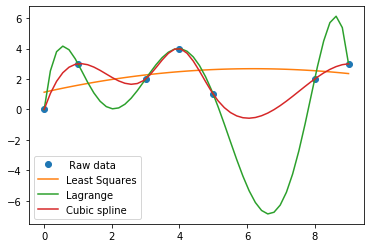

In [1]:
%matplotlib inline
from scipy.interpolate import *
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

clf = linear_model.LinearRegression()

x = np.array([0, 1, 3, 4 ,5, 8, 9])
y = np.array([0, 3, 2, 4, 1, 2, 3])
X = [[z,z*z] for z in x] 

xmax = x.max(); xmin = x.min()

clf.fit(X,y)
a1 = clf.coef_[0]
a2 = clf.coef_[1]
b = clf.intercept_
# f_line = interp1d(x, y)
f_CS = interp1d(x, y, kind='cubic')
f_LG = lagrange(x,y)

#for plot
xnew =np.linspace(xmin, xmax, num=50)
plt.plot(x, y, 'o', label =" Raw data")
plt.plot(xnew,a1*xnew + a2*xnew*xnew + b, label="Least Squares")
# plt.plot(xnew,f_line(xnew),label = "line")
plt.plot(xnew,f_LG(xnew), label = "Lagrange")
plt.plot(xnew, f_CS(xnew), '-',label ="Cubic spline")

_ = plt.legend(loc='best')


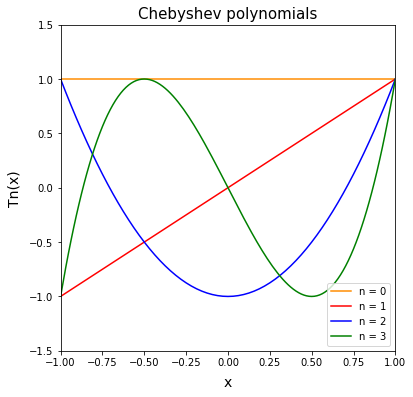

In [2]:
from scipy.special import eval_chebyt

z = np.array([-1, -0.5, 0, 0.5, 1])

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_title("Chebyshev polynomials", size = 15)
# ax.grid()
ax.set_xlim(-1, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("x", size = 14, labelpad = 8)
ax.set_ylabel("Tn(x)", size = 14, labelpad = 8)

# x座標データ
x = np.linspace(-1, 1, 129)

# 色のリスト
c = ["red", "blue", "green", "darkorange"]

# T0,T1,T2,T3のグラフを描画
for i in range(4):
    ax.plot(x, eval_chebyt(i, x),
            label = "n = {}".format(i), color = c[i-1])

# 凡例を表示
_ = ax.legend()
